# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

      The used car market is highly competitive, and dealerships need to understand what factors most influence a car’s resale value to make informed pricing decisions.

      This project involves a thorough exploration of the dataset to uncover significant patterns and correlations, followed by the construction and validation of models that can accurately predict car prices based on impact of various features, such as car age, odometer reading, manufacturer, model, and condition. By analyzing these factors, we aim to provide actionable insights that will enable the dealership to optimize inventory management, enhance pricing strategies, and better meet consumer demands.

      The end goal is to empower the dealership with data-driven recommendations on which attributes are most valued by consumers, thereby increasing profitability and customer satisfaction in a competitive market.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

    In this phase we should dive into understanding data at hand. There are few steps we can do

1) Initial Data Exploration 
   	  Load the dataset and take a first look at its structure, including the number of rows and columns, data types, and any immediate anomalies. Generate summary statistics for numerical and categorical features to understand the distribution, central tendency, and spread of the data.
    
2) Check for Missing Values
	 Check for missing values in each column to understand the extent of missing data. Missing data can impact model performance if not handled properly. In this step we need develop a plan to impute, fill, or remove missing values depending on the significance of the feature and the extent of missing data.
    
3) Data Type Conversion
	 Ensure that all columns have the correct data types (e.g., numeric, categorical). Convert data types where necessary, such as converting string representations of numbers to numeric types.

4) Explore Data Distributions
	 Use histograms, box plots, and density plots to understand the distribution of key numerical features (e.g., price, odometer, year). This can reveal outliers, skewness, and any irregularities in the data. Analyze the distribution of categorical features, such as the frequency of each category in the manufacturer, condition, and fuel columns.
    
5)  Identify and Handle Outliers
	 Identify outliers in numerical features such as price, odometer, and year. Outliers can distort model training, so it’s important to consider how they should be handled. Decide whether to cap, transform, or remove outliers based on their impact on the analysis.
    
6)  Correlation Analysis
	 Generate a correlation matrix to identify relationships between numerical variables. This helps in understanding which features might be most predictive of car prices. Begin thinking about feature selection and engineering based on the correlations observed.
   
7) Data Quality Assessment
	 Ensure consistency across the dataset. For example, check that the year is within a reasonable range and that the odometer readings are plausible for the given year. Identify and address any inconsistencies, duplicate records, or anomalies that could affect the analysis.
    
8) Feature Engineering Considerations
	 Based on the insights gained from the exploration, consider creating new features that might enhance model performance (e.g., age of the car, interaction terms between manufacturer and condition). Get the dataset ready for modeling by finalizing the features, handling missing values, and encoding categorical variables.

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from IPython.display import Image, display
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
!pip install matplotlib-venn
from matplotlib_venn import venn2

import warnings

warnings.filterwarnings('ignore')


In [520]:
vehicles = pd.read_csv('data/vehicles.csv')

vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


    Looking at the first few rows itself it is very clear that there are lot of NaN columns values even on important columns like Odometer, Condition, Fuel, Drive, etc. This data needs clean up. Before that let's do additional analysis like plotting etc. If needed, we will make some changes to the data set if it helps in analysis.

In [521]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [522]:
# Summary statistics for numerical columns
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [523]:
# Summary statistics for categorical columns
vehicles.describe(include=['object'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


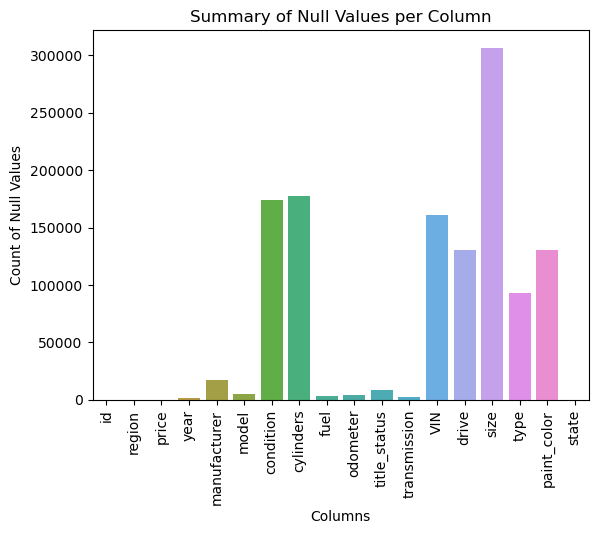

In [524]:
# Null Check
isNullSummary_data = vehicles.isnull().sum()

sns.barplot(x=isNullSummary_data.index, y=isNullSummary_data.values)
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Summary of Null Values per Column')
plt.xticks(rotation=90)
plt.show()


      Chart clearly validated our initial look up. Count of NaN values are extremely huge in various columns. Additional analysis will help us to decide if these rows can be dropped for modeling or we will have to impute or fill the missing values. 
      Note: Not all columns that has null value can be dropped.

In [525]:
# Converting price column to numeric
vehicles.loc[:, 'price'] = pd.to_numeric(vehicles['price'], errors='coerce')


In [526]:
# Check for duplicates and drop them. First drop 'id' column and check for duplicates
# Reason why dropping - VIN numbers are unique with that it is not possible to have duplicate entries for the same car. 

vehicles_dropped_id = vehicles.drop(columns=['id'])
duplicates = vehicles_dropped_id.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

duplicate_rows = vehicles_dropped_id[vehicles_dropped_id.duplicated()]

vehicles_duplicates_dropped = vehicles_dropped_id.drop_duplicates()

Number of duplicate rows: 56202


    In order to do a duplicate check we need to remove 'id' column as it will always shows uniqueness. Along with the VIN, data set cannot have duplicate rows with same values in all columns. If there are such rows we can drop them before modeling.

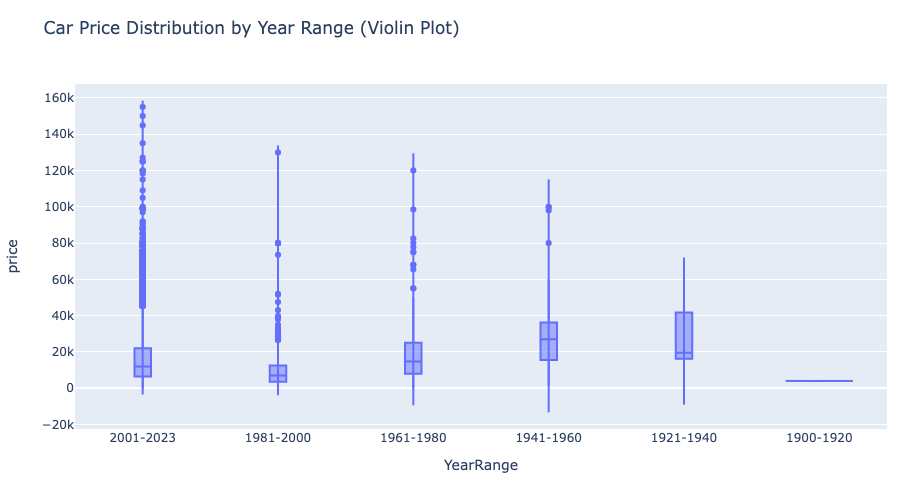

In [527]:
# Checking Year Range in the data set. And also ploting against the price.

distinct_years = vehicles_duplicates_dropped['year'].dropna().unique()
distinct_years_sorted = sorted(distinct_years)

bins = [1900, 1920, 1940, 1960, 1980, 2000, 2022]
labels = ['1900-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2023']
grouped_vehicles = vehicles_duplicates_dropped.copy()
grouped_vehicles.loc[:,'YearRange'] = pd.cut(grouped_vehicles['year'], bins=bins, labels=labels, right=False)

violin_fig = px.violin(grouped_vehicles, x='YearRange', y='price', box=True, title='Car Price Distribution by Year Range (Violin Plot)')
#violin_fig.show()

display(Image(filename='images/Year Range and Car Prices.png'))

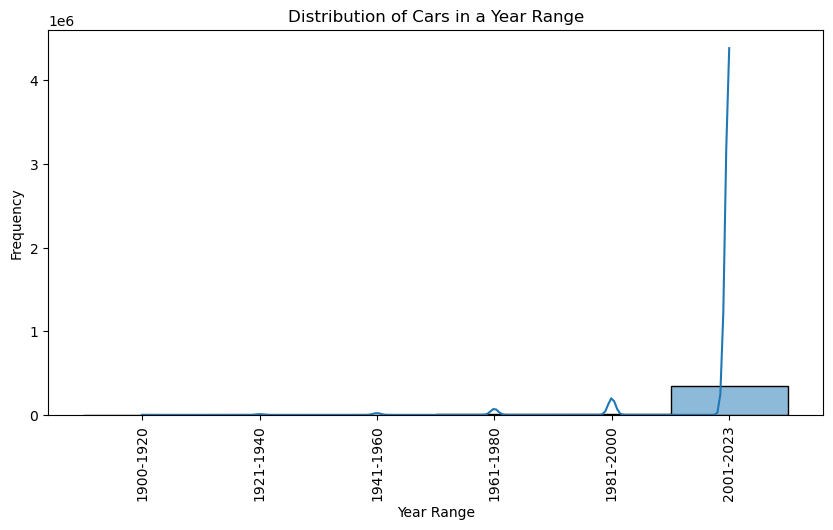

In [528]:
# Distribution of Year Range
plt.figure(figsize=(10, 5))
sns.histplot(grouped_vehicles['YearRange'], bins=100, edgecolor='black', kde=True)
plt.title('Distribution of Cars in a Year Range')
plt.xlabel('Year Range')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

    Based on Voilin Plot and Hist Plot, it is clear that we have wide range of data from the year 1980 and 2022. Wide range in dat set will be helpful in modeling.

In [529]:
# Checking for inconsitent data. 

min_year = 1980
max_year = 2023

max_odometer = 500000

vehicles_duplicates_dropped.loc[:,'car_age'] = 2023 - vehicles_duplicates_dropped['year']


vehicles_duplicates_dropped.loc[:,'inconsistent'] = (
    (vehicles_duplicates_dropped['year'] < min_year) |
    (vehicles_duplicates_dropped['year'] > max_year) |
    (vehicles_duplicates_dropped['odometer'] > max_odometer) |
    ((2023 - vehicles_duplicates_dropped['year']) > 0) & 
    (vehicles_duplicates_dropped['odometer'] < 1000)
)

inconsistent_records = vehicles_duplicates_dropped[vehicles_duplicates_dropped['inconsistent'] == True]
print(f"Number of inconsistent records: {inconsistent_records.shape[0]}")



Number of inconsistent records: 16889


    Based on the year range figured earlier, came up with a logic to find out if there are any inconsistent data present. For this I have kept the max odometer to have 500000. So if a car is not with 1980-2023 or above max odometer or if a car has certain age but driven less than 1000 miles then I can considering those as Inconsistent Data. After analyzing other details let's figure out whether to drop these rows with inconsistent column set to True.

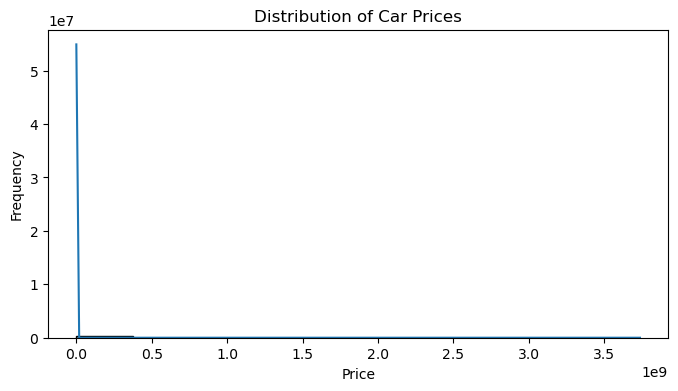

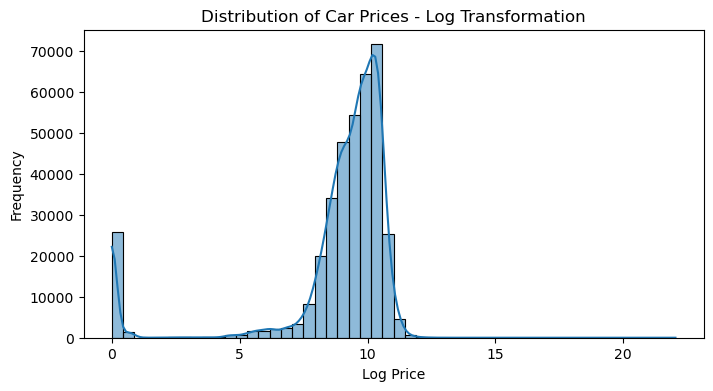

In [530]:
# Distribution of price
plt.figure(figsize=(8, 4))
sns.histplot(vehicles_duplicates_dropped['price'], bins=10, edgecolor='black', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

vehicles_duplicates_dropped['log_price'] = np.log1p(vehicles_duplicates_dropped['price'])
vehicles_duplicates_dropped['log_odometer'] = np.log1p(vehicles_duplicates_dropped['odometer'])

plt.figure(figsize=(8, 4))
sns.histplot(vehicles_duplicates_dropped['log_price'], bins=50, edgecolor='black', kde=True)
plt.title('Distribution of Car Prices - Log Transformation')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

    Distribution of Car Prices shows that there is a good amount of cars available for modeling between the log price of 6 to 13. But should we consider used cars with price 0? When I analyzed separately there are rows with price less than 1000 in a good condition. It could be a gift or exchange for free etc. Let's consider those as outliers for now. So for our modeling I have decided to consider the log price from 6 to 13. 
    
    Here I have used np.log to convert Price. This reduces data skewness and stabilize the variance. You can see that in Data Preparation phase.

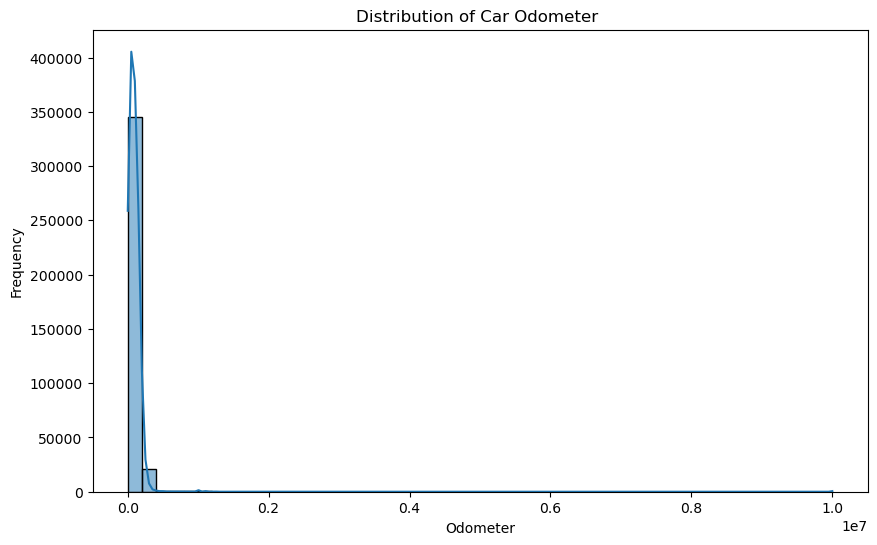

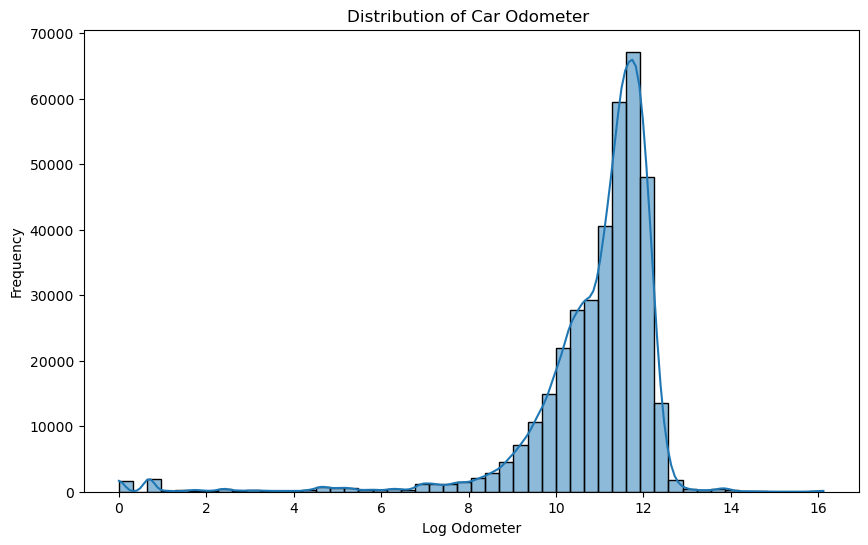

In [531]:
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_duplicates_dropped['odometer'], bins=50, edgecolor='black',kde=True)
plt.title('Distribution of Car Odometer ')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()


# Plot the histogram of the odometer (with log transformation)
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_duplicates_dropped['log_odometer'], bins=50, edgecolor='black',kde=True)
plt.title('Distribution of Car Odometer ')
plt.xlabel('Log Odometer')
plt.ylabel('Frequency')
plt.show()

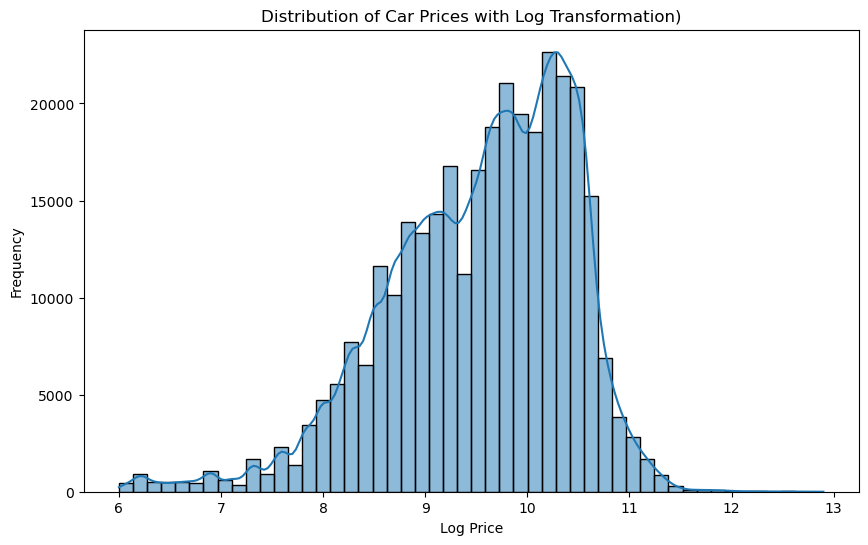

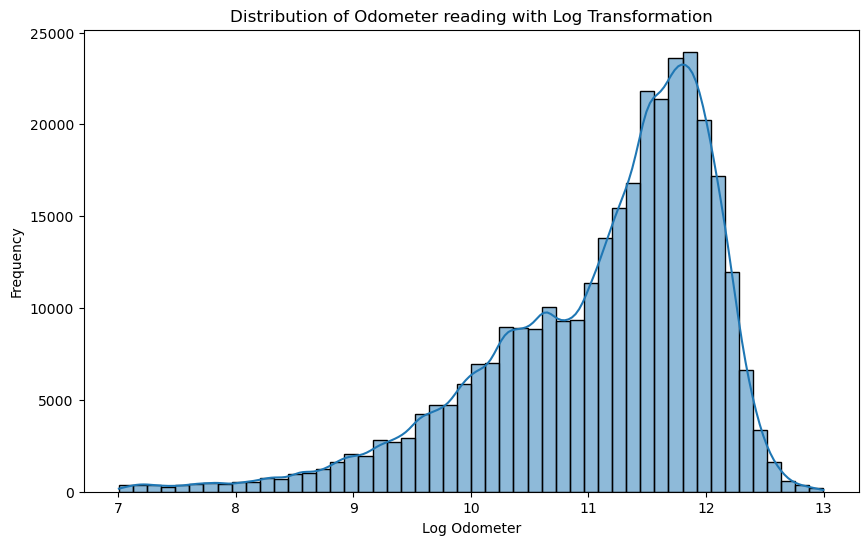

In [532]:
# Initial filter of cars data based on Data Evaluation 

vehicles_filtered = vehicles_duplicates_dropped.loc[
    (vehicles_duplicates_dropped['log_odometer'] >= 7) & 
    (vehicles_duplicates_dropped['log_odometer'] <= 13) &
    (vehicles_duplicates_dropped['log_price'] >= 6) &
    (vehicles_duplicates_dropped['log_price'] <= 13) &
    (vehicles_duplicates_dropped['inconsistent'] == False)
]

# Plot the histogram of the Price after filtering (log transformation)

plt.figure(figsize=(10, 6))
sns.histplot(vehicles_filtered['log_price'], bins=50, edgecolor='black',kde=True)
plt.title('Distribution of Car Prices with Log Transformation)')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

# Plot the histogram of the Odometer after filtering (log transformation)
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_filtered['log_odometer'], bins=50, edgecolor='black',kde=True)
plt.title('Distribution of Odometer reading with Log Transformation')
plt.xlabel('Log Odometer')
plt.ylabel('Frequency')
plt.show()

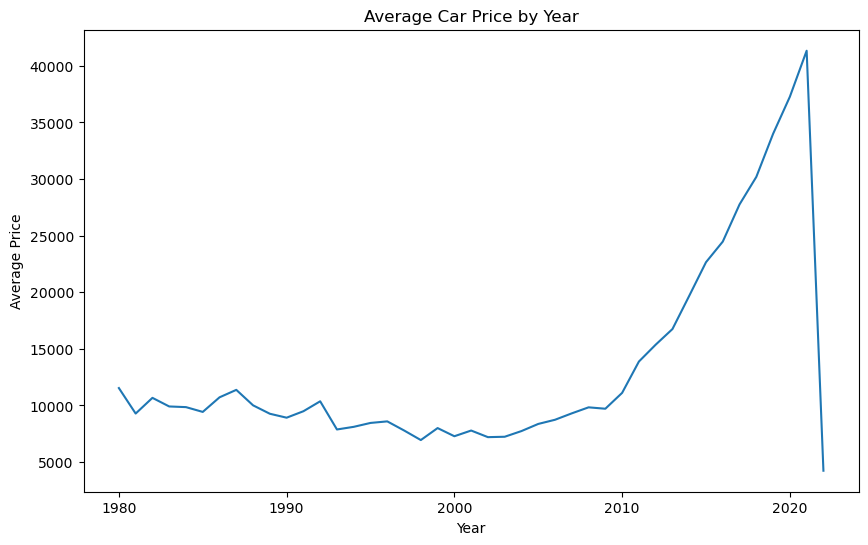

In [533]:
avg_price_by_year = vehicles_filtered.groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
avg_price_by_year.plot()
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

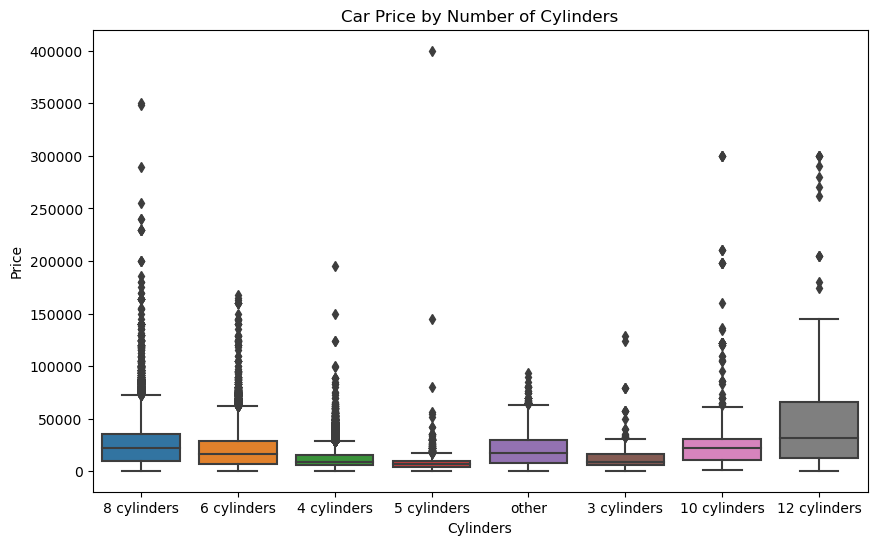

In [534]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='price', data=vehicles_filtered)
plt.title('Car Price by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

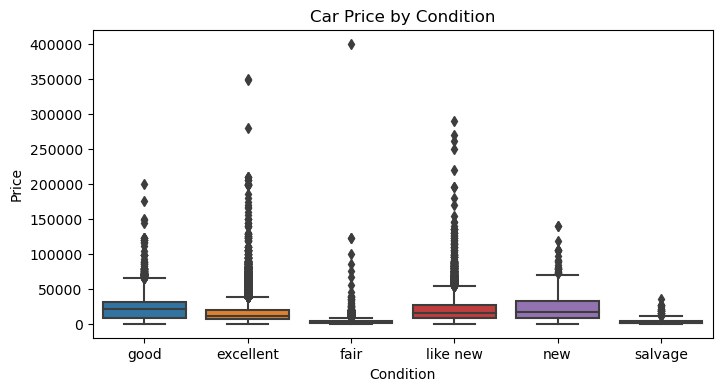

In [535]:
# Box plot of price by condition
plt.figure(figsize=(8, 4))
sns.boxplot(x='condition', y='price', data=vehicles_filtered)
plt.title('Car Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

    Overall data set contains a good range or cars with different conditions. It will be easier if we can reduce the number of categories. Like merging 'New and Like New' with 'Excellent' and 'fair' with 'good'. This would avoid certain outlier issues as well. 

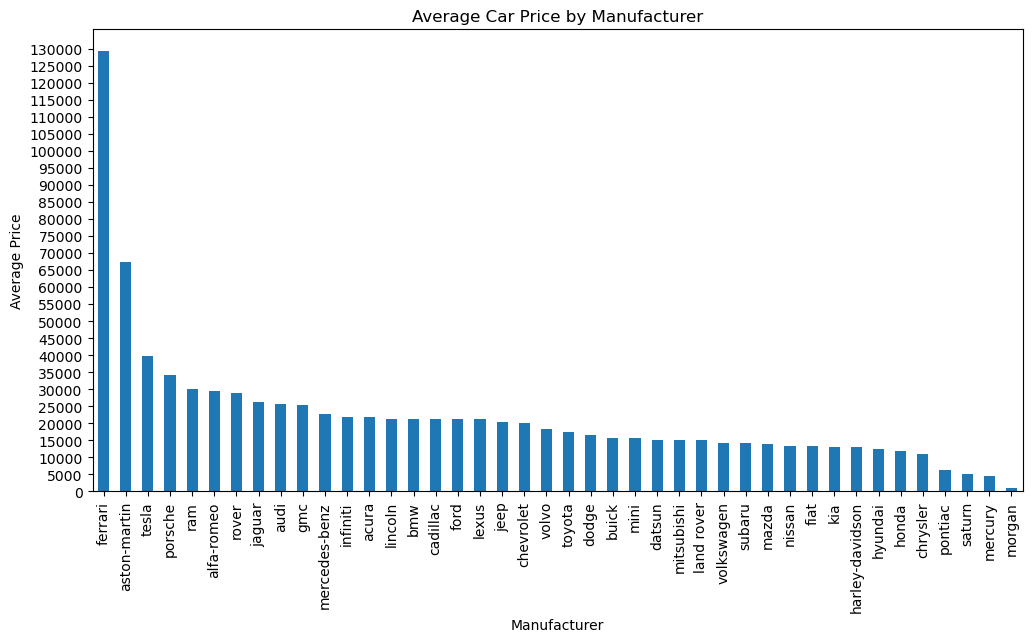

In [536]:
# Calculate the average price by 'manufacturer'
avg_price_by_manufacturer = vehicles_filtered.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

# Plot the average price by manufacturer
plt.figure(figsize=(12, 6))
avg_price_by_manufacturer.plot(kind='bar', stacked=False)
plt.title('Average Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

max_price = avg_price_by_manufacturer.max()
tick_interval = 5000  # Set this to a smaller value to have more ticks
plt.yticks(np.arange(0, max_price + tick_interval, tick_interval))

plt.show()

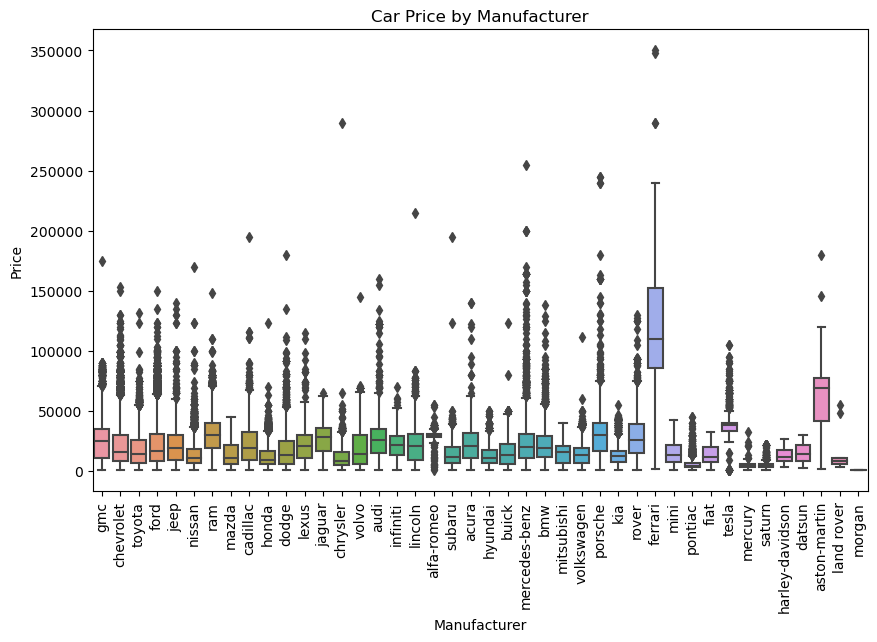

In [537]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer', y='price', data=vehicles_filtered)
plt.title('Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

     This plot shows how a manufacturing can decide a price. Because of the brand value the cars will have higher price range even with good Odometer. Looking at this, it makes me realize that we can actually drop model column as manufacturing column will provide more details. May be we can ranke these manufactures based on average price and give a number to them. This will help in modeling. 
     Say, Mercury and Saturn is 1, Dodge till Honda is 3, Datsun till Toyota is 4 etc.Building Model with that will be faster at the same time we do not lose data.

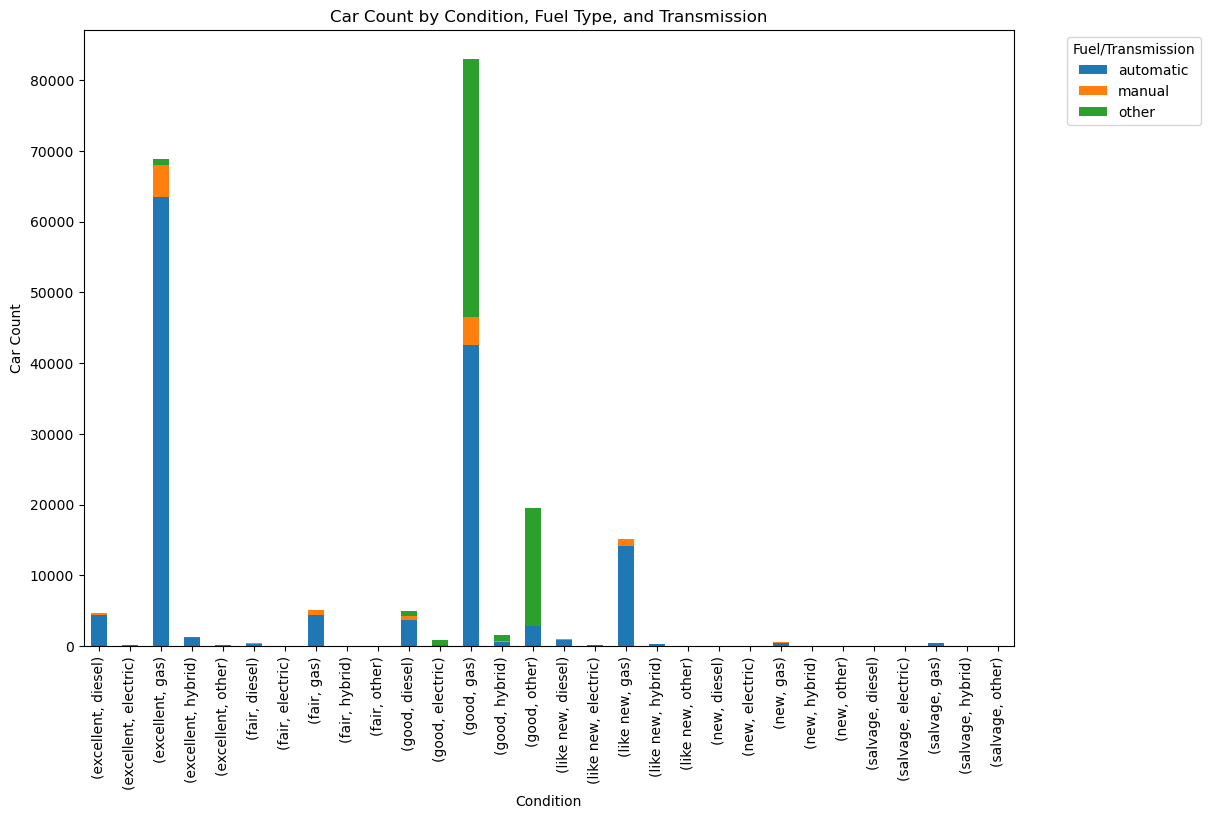

In [538]:
### STACKED BAR PLOT

#Group the data by 'condition', 'fuel', and 'transmission', and count the number of occurrences
grouped_data = vehicles_filtered.groupby(['condition', 'fuel', 'transmission']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Car Count by Condition, Fuel Type, and Transmission')
plt.xlabel('Condition')
plt.ylabel('Car Count')
plt.legend(title='Fuel/Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')  # Positioning the legend outside the plot
plt.xticks(rotation=90)
plt.show()

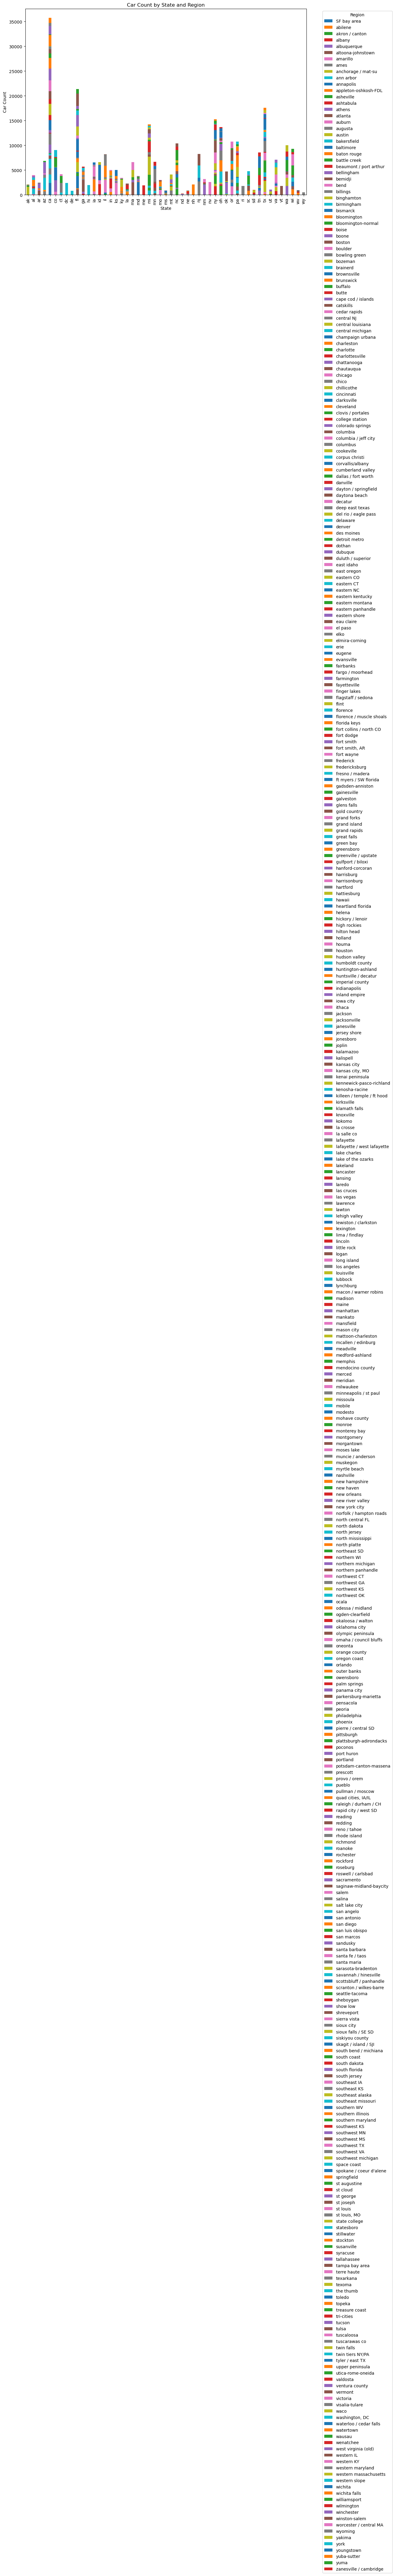

In [539]:
# Group by 'state' and 'region', then count the occurrences
grouped_data_2 = vehicles_filtered.groupby(['state', 'region']).size().unstack(fill_value=0)

grouped_data_2.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Car Count by State and Region')
plt.xlabel('State')
plt.ylabel('Car Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

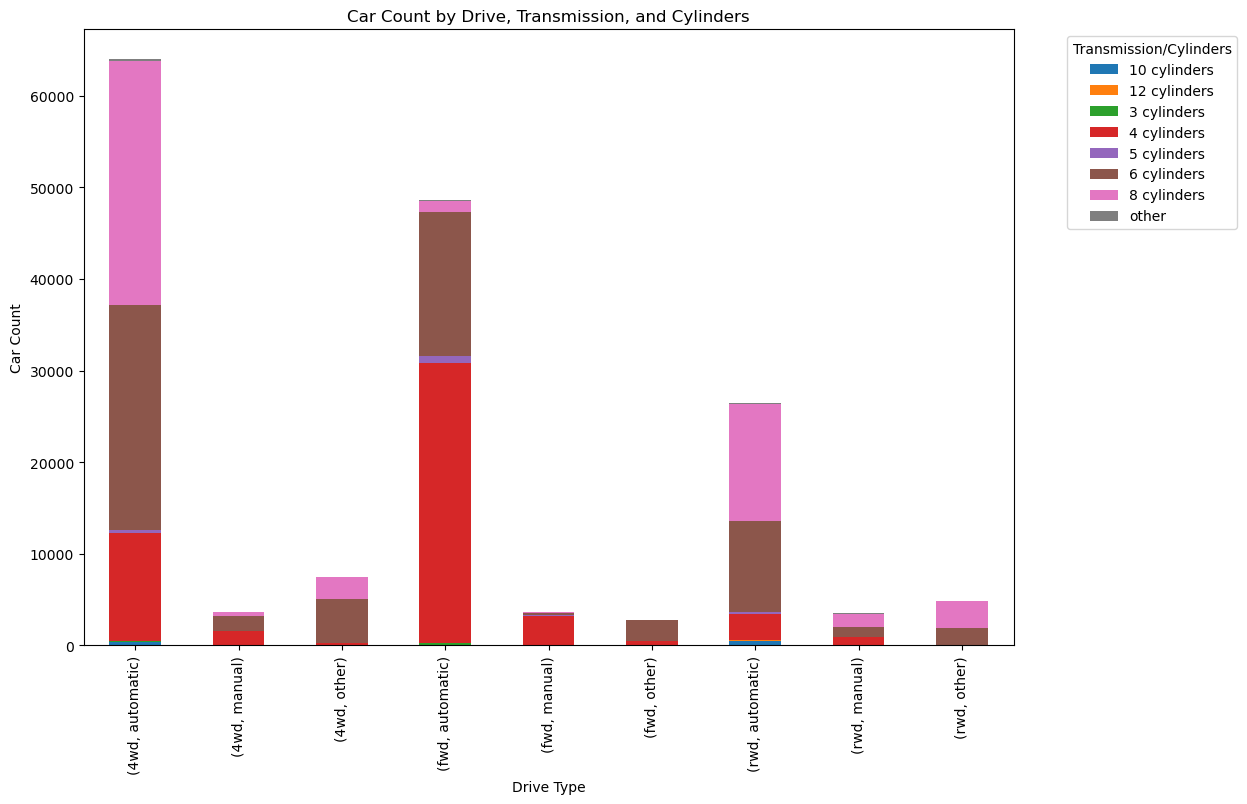

In [540]:
# Group by 'drive', 'transmission', and 'cylinders', then count the occurrences
grouped_data_3 = vehicles_filtered.groupby(['drive', 'transmission', 'cylinders']).size().unstack(fill_value=0)

grouped_data_3.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Car Count by Drive, Transmission, and Cylinders')
plt.xlabel('Drive Type')
plt.ylabel('Car Count')
plt.legend(title='Transmission/Cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

    These stacked bar plot show the groupings of related categorical values (from my view). Created these plot to see if I can infer some value. 
    Plot one shows that there are more gas cars with excellent and good conditions compared to others.
    Plot two shows that certain states has more used cars compared to other states.
    Plot three shows the combinations of cars with drive transmission and cylinders.

Number of outliers in price: 5817


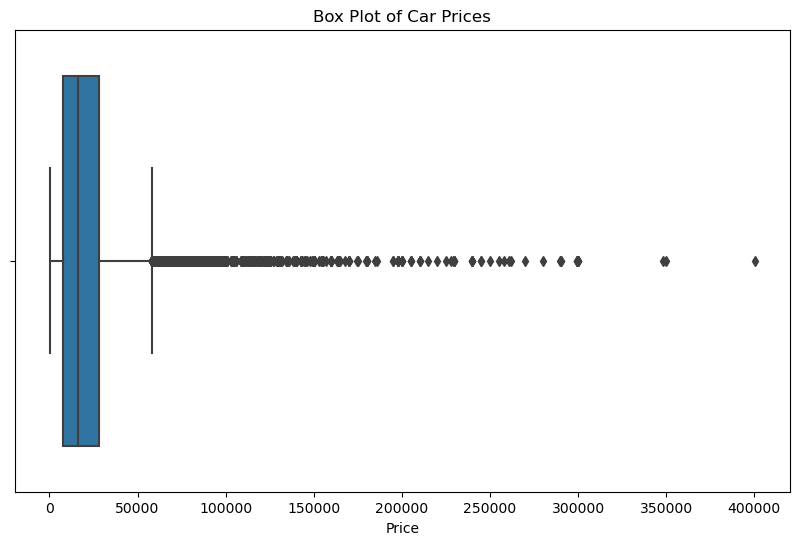

In [541]:
Q1 = vehicles_filtered['price'].quantile(0.25)
Q3 = vehicles_filtered['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = vehicles_filtered[
    (vehicles_filtered['price'] < Q1 - 1.5 * IQR) | 
    (vehicles_filtered['price'] > Q3 + 1.5 * IQR)
]
print(f"Number of outliers in price: {outliers.shape[0]}")

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=vehicles_filtered['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

     Outliers can distort model training, so it’s important to consider how they should be handled. Here I am considering 25 to 75 percentile price range and calculated Interquartile Range. Then applied lower bound and upper bound on the price column with some threshold. 
     
     Box Plot again shows that, most of the data set is from 0 to 200000 price range. As we mentioned before, for this exercise I will be considering date set with price more than 1000 till 200000.  

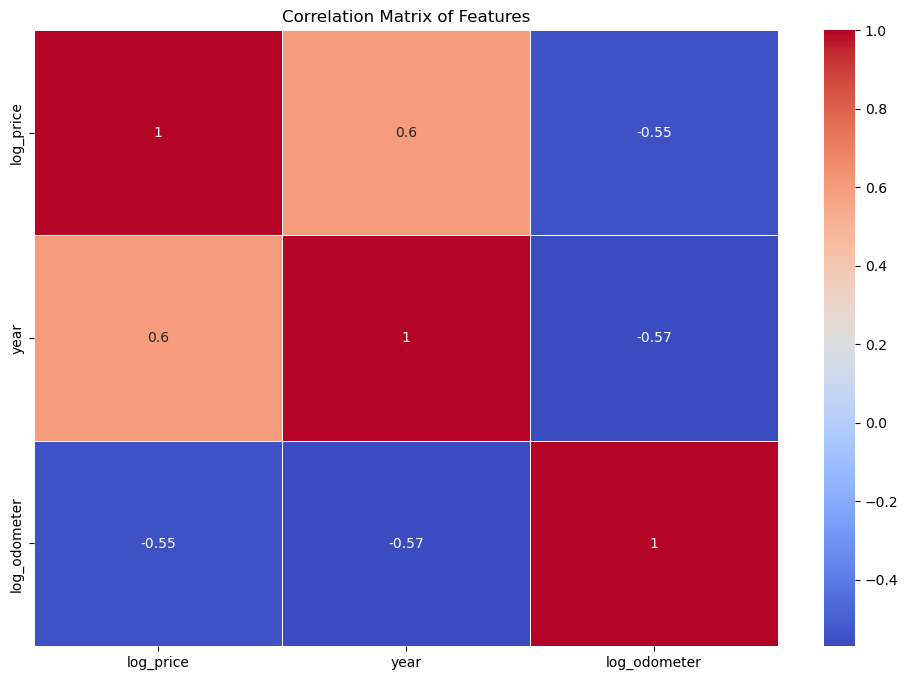

In [542]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = vehicles_filtered[['log_price','year','log_odometer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

     This correlation matrix shows the correlation between price and other numerical values. This map shows that there is a high positive correlation between price and year and negative correlation between price and odometer and car age. 

In [383]:
# Violin Plot for Price by Region
#violin_fig_region = px.violin(vehicles_filtered, x='condition', y='price', box=True, title='Car Price Distribution by Region (Violin Plot)')
#violin_fig_region.show()

In [382]:
#avg_price_by_manufacturer = vehicles_filtered.groupby('manufacturer')['price'].mean().sort_values()
#plt.figure(figsize=(10, 6))
#avg_price_by_manufacturer.plot(kind='bar')
#plt.title('Average Car Price by Manufacturer')
#plt.xlabel('Manufacturer')
#plt.ylabel('Average Price')
#plt.xticks(rotation=90)
#plt.show()

In [381]:
#plt.figure(figsize=(10, 6))
#plt.scatter(vehicles_filtered['log_odometer'], vehicles_filtered['log_price'], alpha=0.5)
#plt.title('Car Price vs. Odometer Reading')
#plt.xlabel('Log Odometer')
#plt.ylabel('Log Price')
#plt.show()

In [380]:
#plt.figure(figsize=(10, 6))
#sns.jointplot(x='log_odometer', y='log_price', data=vehicles_filtered, kind='hex', gridsize=30, cmap='Blues')
#plt.title('Hexbin of Price vs. Odometer Reading')
#plt.xlabel('Log Odometer')
#plt.ylabel('Log Price')
#plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [543]:
# Step 1: Remove rows with null values in "cylinders"
vehicle_clean = vehicles_filtered.dropna(subset=['cylinders','odometer'])

# Step 2: Drop the "VIN" and "model" columns
vehicle_clean = vehicle_clean.drop(columns=['VIN', 'model','size','paint_color','inconsistent','car_age'])

# Step 3: Filter data from 1980 to 2022
vehicle_clean = vehicle_clean[(vehicle_clean['year'] >= 1980) & (vehicle_clean['year'] <= 2022)]

# Step 4: Impute Categorical columns based on readings from chart above 
vehicle_clean['title_status'].fillna('clean', inplace=True)
vehicle_clean['fuel'].fillna('gas', inplace=True)
vehicle_clean['transmission'].fillna('automatic', inplace=True)
vehicle_clean['condition'].fillna('others', inplace=True)
vehicle_clean['manufacturer'].fillna('others', inplace=True)
vehicle_clean['type'].fillna('unknown', inplace=True)
vehicle_clean['drive'].fillna('fwd', inplace=True)


text_to_replace = {'new': 'excellent', 'fair': 'good', 'like new': 'good', '':''}

vehicle_clean = vehicle_clean.replace(text_to_replace)

# Convert Categorical Column to Numerical Column
vehicle_clean['cylinders'] = vehicle_clean['cylinders'].str.replace('cylinders','')
vehicle_clean['cylinders'] = vehicle_clean['cylinders'].str.replace('other','2')
vehicle_clean['cylinders'] = pd.to_numeric(vehicle_clean['cylinders'], errors='coerce')


vehicle_clean.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,log_price,log_odometer
27,auburn,33590,2014.0,gmc,good,8,gas,57923.0,clean,other,fwd,pickup,al,10.422013,10.966887
28,auburn,22590,2010.0,chevrolet,good,8,gas,71229.0,clean,other,fwd,pickup,al,10.025307,11.173669
29,auburn,39590,2020.0,chevrolet,good,8,gas,19160.0,clean,other,fwd,pickup,al,10.586357,9.860632
30,auburn,30990,2017.0,toyota,good,8,gas,41124.0,clean,other,fwd,pickup,al,10.341452,10.624371
31,auburn,15000,2013.0,ford,excellent,6,gas,128000.0,clean,automatic,rwd,truck,al,9.615872,11.759793


In [421]:
vehicle_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193023 entries, 27 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        193023 non-null  object 
 1   price         193023 non-null  int64  
 2   year          193023 non-null  float64
 3   manufacturer  193023 non-null  object 
 4   condition     193023 non-null  object 
 5   cylinders     193023 non-null  int64  
 6   fuel          193023 non-null  object 
 7   odometer      193023 non-null  float64
 8   title_status  193023 non-null  object 
 9   transmission  193023 non-null  object 
 10  drive         193023 non-null  object 
 11  type          193023 non-null  object 
 12  state         193023 non-null  object 
 13  log_price     193023 non-null  float64
 14  log_odometer  193023 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 23.6+ MB


In [544]:
max_price = vehicle_clean['price'].max()

min_price = vehicle_clean['price'].min()

print(f"Maximum price: {max_price}")
print(f"Minimum price: {min_price}")

max_odometer = vehicle_clean['odometer'].max()

min_odometer = vehicle_clean['odometer'].min()

print(f"Maximum Odometer: {max_odometer}")
print(f"Minimum Odometer: {min_odometer}")


Maximum price: 400123
Minimum price: 403
Maximum Odometer: 438000.0
Minimum Odometer: 1100.0


### Clustering

     Exercise below is to find a good clustered rows in the data set and trying to group them. Based on the KMeans clustering inertia 8 to 9 is a good cluster group. Below is the elbow chart and the clustering chart.
     Also used DBSCAN to find clusters by setting epsilon value. As this data set is large I went with larget sample size. This is one area we could explore.
     PCA analysis is not needed for this use case as there is more categorical features and less numerical features. Correlation Matrix shows a good visual on which feature is positively correlated to price and which feature is negatively correlated to price.

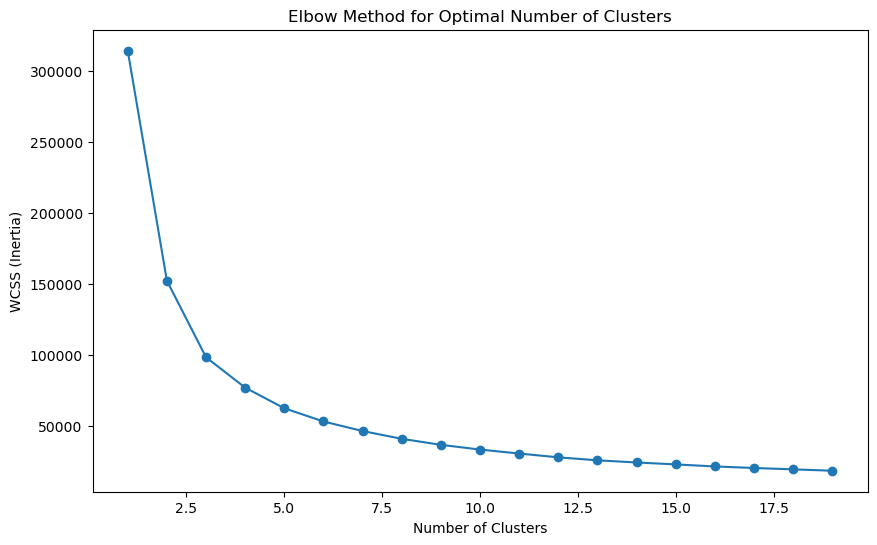

In [545]:
# Prepare data for clustering (using lop price and log odometer)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vehicle_clean[['log_price', 'log_odometer']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

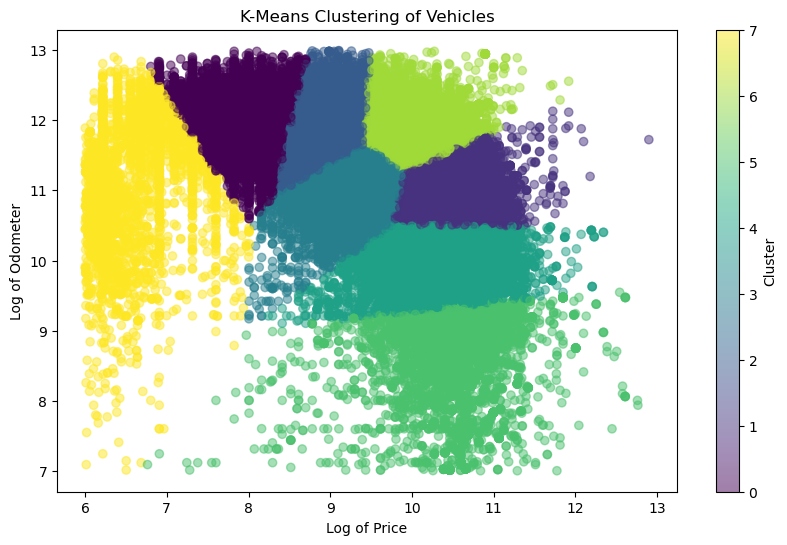

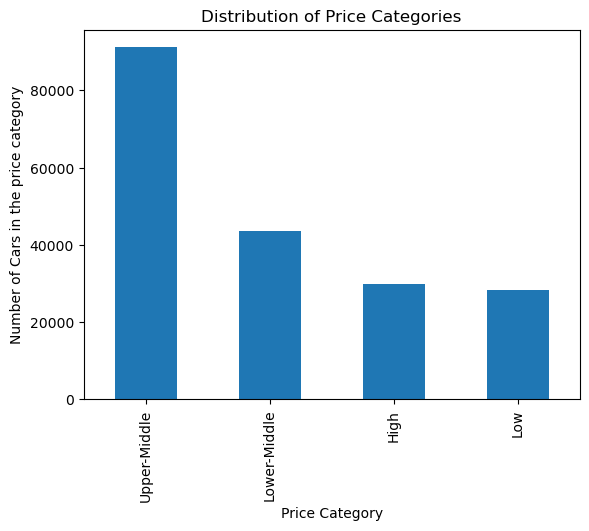

In [546]:
kmeans = KMeans(n_clusters=8, random_state=42) 
vehicle_clean['cluster'] = kmeans.fit_predict(vehicle_clean[['log_price', 'log_odometer']])


plt.figure(figsize=(10, 6))
plt.scatter(vehicle_clean['log_price'], vehicle_clean['log_odometer'], c=vehicle_clean['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Vehicles')
plt.xlabel('Log of Price')
plt.ylabel('Log of Odometer')
plt.colorbar(label='Cluster')
plt.show()



### Group manufacturers into quartiles based on average price

avg_price_by_manufacturer = vehicle_clean.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
price_quartiles = pd.qcut(avg_price_by_manufacturer, q=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])

vehicle_clean['price_category_quartile'] = vehicle_clean['manufacturer'].map(price_quartiles)

vehicle_clean['price_category_quartile'].value_counts().plot(kind='bar')
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Cars in the price category')
plt.show()


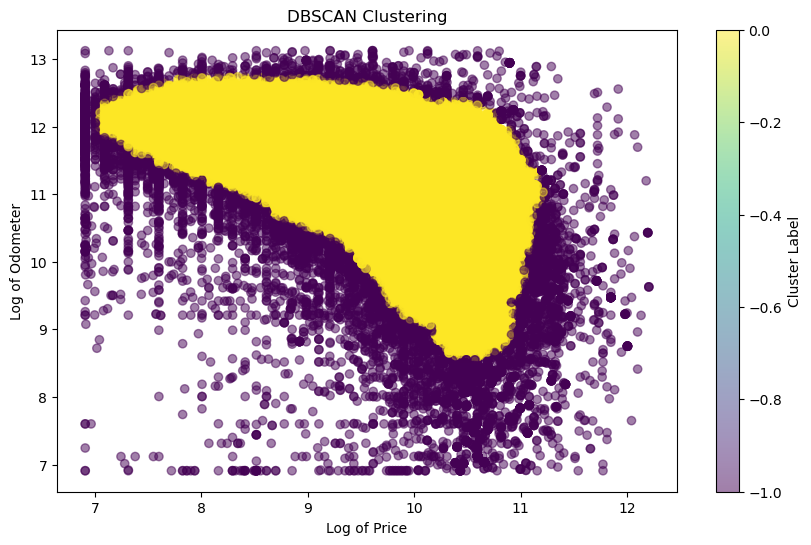

In [343]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vehicle_clean[['log_price', 'log_odometer']])

# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.2, min_samples=500)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Add the DBSCAN cluster labels to the dataset
vehicle_clean['dbscan_cluster'] = dbscan_labels

# Visualize the DBSCAN clustering
plt.figure(figsize=(10, 6))
plt.scatter(vehicle_clean['log_price'], vehicle_clean['log_odometer'], c=vehicle_clean['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Log of Price')
plt.ylabel('Log of Odometer')
plt.colorbar(label='Cluster Label')
plt.show()

vehicle_clean = vehicle_clean.drop(columns=['dbscan_cluster'])

In [487]:
# This is just to try a 500 sample size of cleaned up data set to the model to see if there are any issues.
vehicle_clean_dummy = vehicle_clean.sample(n=500, random_state=42)
X_dummy_columns = vehicle_clean_dummy.drop(columns=['price', 'log_price','region','state','odometer','cluster','price_category_quartile'])
y_dummy_columns = vehicle_clean_dummy['log_price']

    This is a X and y values created for various selections of fields to be picked and trained against the created model.

In [547]:
X_selected_columns = vehicle_clean.drop(columns=['price', 'log_price','region','state','odometer','cluster','price_category_quartile'])
y_selected_columns = vehicle_clean['log_price']  

In [548]:
X_state_region = vehicle_clean.drop(columns=['price', 'log_price','cluster','price_category_quartile','odometer'])
y_state_region = vehicle_clean['log_price']  

In [549]:
X_with_cluster = vehicle_clean.drop(columns=['price', 'log_price','region','state','odometer'])
y_with_cluster = vehicle_clean['log_price']  

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [550]:
def basic_linear_regression(X, y):
    X = pd.get_dummies(X, drop_first=True)
    y = y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = linear_model.predict(X_train_scaled)
    y_test_pred = linear_model.predict(X_test_scaled)

    # Evaluate the model
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_test = mean_squared_error(y_test_pred, y_test)
    rmse_test = np.sqrt(mse_test)

    #print(f"Mean Squared Error (MSE) of the Linear Regression Train Set: {mse_train}")

    #print(f"Mean Squared Error (MSE) of the Linear Regression Test Set: {mse_test}")

    return  mse_train, mse_test, rmse_test

In [551]:
mse_train, mse_test, rmse_test = basic_linear_regression(X_selected_columns, y_selected_columns)

print(f"Mean Squared Error (MSE) of the Linear Regression Train Set: IMP Fields only: {mse_train}")

print(f"Mean Squared Error (MSE) of the Linear Regression Test Set: IMP Fields only: {mse_test}")

mse_train, mse_test, rmse_test = basic_linear_regression(X_state_region, y_state_region)

print(f"Mean Squared Error (MSE) of the Linear Regression Train Set: State and Region included : {mse_train}")

print(f"Mean Squared Error (MSE) of the Linear Regression Test Set: State and Region included : {mse_test}")

mse_train, mse_test, rmse_test = basic_linear_regression(X_with_cluster, y_with_cluster)

print(f"Mean Squared Error (MSE) of the Linear Regression Train Set: Clusters not included : {mse_train}")

print(f"Mean Squared Error (MSE) of the Linear Regression Test Set: Clusters not included : {mse_test}")

Mean Squared Error (MSE) of the Linear Regression Train Set: IMP Fields only: 0.32795214364888936
Mean Squared Error (MSE) of the Linear Regression Test Set: IMP Fields only: 0.3259603326459001
Mean Squared Error (MSE) of the Linear Regression Train Set: State and Region included : 0.3150277176721545
Mean Squared Error (MSE) of the Linear Regression Test Set: State and Region included : 5.757184084110222e+20
Mean Squared Error (MSE) of the Linear Regression Train Set: Clusters not included : 0.3277292815510533
Mean Squared Error (MSE) of the Linear Regression Test Set: Clusters not included : 0.3257202959946826


In [333]:
# Random Forest model

X_train, X_test, y_train, y_test = train_test_split(X_selected_columns, y_selected_columns, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Cross-validate the Random Forest model
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE of the Random Forest model: {cv_rmse.mean()}")

Cross-validated RMSE of the Random Forest model: 0.19721256707460336


In [507]:
def all_aspect_model(X, y):
    
    #Split Training and Testing Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    categorical_features = X.select_dtypes(include=['object', 'category','int32']).columns.tolist()
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # linear model for feature selection
    linear_model_for_sfs = LinearRegression()

    # Add Sequential Feature Selector to the pipeline
    sfs = SequentialFeatureSelector(linear_model_for_sfs, n_features_to_select=3, direction='forward')

    # Create a Lasso model for RFE
    lasso_for_rfe = Lasso(alpha=0.1)

    # Add RFE with Lasso to the pipeline
    rfe = RFE(estimator=lasso_for_rfe, n_features_to_select=3)

    # Define Ridge model with transformed target
    ridge = Ridge()
    model = TransformedTargetRegressor(
        regressor=ridge,
        transformer=StandardScaler()
    )
    
    # Pipeline that includes the preprocessor, SFS, RFE, and a Ridge regression model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('sfs', sfs),  # Sequential Feature Selector
        ('rfe', rfe),  # RFE with Lasso
        ('model', model)  # model with Ridge
    ])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'model__regressor__alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'preprocessor__num__poly__degree': [1, 2],  # Polynomial degree
        'sfs__n_features_to_select': [2, 3, 5],  # Number of features to select in SFS
        'rfe__n_features_to_select': [2, 3, 5]  # Number of features to select in RFE
    }

    # Create the GridSearchCV object
    gridSearch = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
    # Fit the model
    gridSearch.fit(X_train,y_train)
    
    # Predict Training and Test Set
    train_preds = gridSearch.predict(X_train)
    test_preds = gridSearch.predict(X_test)
    
    train_mse = mean_squared_error(train_preds, y_train)
    print(f"Mean Squared Error (MSE) of the All Aspect Model Train Set: {train_mse}")
    
    test_mse = mean_squared_error(test_preds, y_test)
    print(f"Mean Squared Error (MSE) of the All Aspect Model Test Set: {test_mse}")
    
    best_params = gridSearch.best_params_
    print("Best Hyperparameters found by GridSearchCV:")
    print(best_params)
    
    best_estimator = gridSearch.best_estimator_
    #print("\nBest Model:")
    #print(best_estimator)
    
    all_features = numerical_features + list(gridSearch.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

    # Get the selected features from SFS
    sfs_selected_features = best_estimator.named_steps['sfs'].get_support(indices=True)
    sfs_feature_names = [all_features[i] for i in sfs_selected_features]
    print("Features selected by Sequential Feature Selector (SFS):")
    print(sfs_feature_names)
    
    # Get the selected features from RFE
    rfe_selected_features = best_estimator.named_steps['rfe'].get_support(indices=True)
    rfe_feature_names = [all_features[i] for i in rfe_selected_features]
    print("Features selected by Recursive Feature Elimination (RFE):")
    print(rfe_feature_names)

    # Apply permutation importance to the best model found by GridSearchCV
    result = permutation_importance(best_estimator, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

    # Summarize feature importance
    featureImportanceSorted = result.importances_mean.argsort()
    
    return featureImportanceSorted, X_test, result


In [552]:
# Sampel try out
#featureImportanceSorted, X_test, result = all_aspect_model(X_dummy_columns, y_dummy_columns)

#print("Permutation Importance of Features:")
#for i in featureImportanceSorted:
#    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

In [510]:

featureImportanceSorted, X_test, result = all_aspect_model(X_selected_columns, y_selected_columns)

print("Permutation Importance of Features:")
for i in featureImportanceSorted:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mean Squared Error (MSE) of the All Aspect Model Train Set: 0.36208693913350903
Mean Squared Error (MSE) of the All Aspect Model Test Set: 0.35990479236699213
Best Hyperparameters found by GridSearchCV:
{'model__regressor__alpha': 0.1, 'preprocessor__num__poly__degree': 2, 'rfe__n_features_to_select': 5, 'sfs__n_features_to_select': 5}
Features selected by Sequential Feature Selector (SFS):
['cylinders', 'manufacturer_acura', 'manufacturer_aston-martin', 'manufacturer_buick', 'title_status_lien']
Features selected by Recursive Feature Elimination (RFE):
['year', 'cylinders', 'log_odometer', 'manufacturer_acura', 'manufacturer_alfa-romeo']
Permutation Importance of Features:
manufacturer: 0.0000
condition: 0.0000
title_status: 0.0000
transmission: 0.0000
drive: 0.0000
type: 0.0000
fuel: 0.0701
cylinders: 0.1932
log_odometer: 0.2931
year: 0.3223


In [511]:
featureImportanceSorted, X_test, result = all_aspect_model(X_state_region, y_state_region)

print("Permutation Importance of Features:")
for i in featureImportanceSorted:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mean Squared Error (MSE) of the All Aspect Model Train Set: 0.36208693913350903
Mean Squared Error (MSE) of the All Aspect Model Test Set: 0.35990479236699213
Best Hyperparameters found by GridSearchCV:
{'model__regressor__alpha': 0.1, 'preprocessor__num__poly__degree': 2, 'rfe__n_features_to_select': 5, 'sfs__n_features_to_select': 5}
Features selected by Sequential Feature Selector (SFS):
['cylinders', 'region_SF bay area', 'region_akron / canton', 'region_altoona-johnstown', 'title_status_lien']
Features selected by Recursive Feature Elimination (RFE):
['year', 'cylinders', 'log_odometer', 'region_SF bay area', 'region_abilene']
Permutation Importance of Features:
region: 0.0000
manufacturer: 0.0000
condition: 0.0000
title_status: 0.0000
transmission: 0.0000
drive: 0.0000
type: 0.0000
state: 0.0000
fuel: 0.0701
cylinders: 0.1932
log_odometer: 0.2931
year: 0.3223


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

    Based on the training and test MSEs from different models it is very clear that best model is found with    Ridge parameter alpha: 0.1, applied Polynomial Feature degree: 2 only on numerical columns. Bar chart below shows different models with varying feature list producing different MSEs and feature selection.
    
    Cross Validation on the Linear Regression Model shows that there is more room for model improvement.
    
    Feature Selections (Sequential and RFE) produced 5 features each and there is a similarity on features. Venn diagram below shows that 2 features are common (cylinders and manufacturer).
    
    Further from the Permuation Importance calculated based on the above models shows that 4 features     would contribute to the model (year, odometer, cylinders, fuel). 
    
    As below charts are for reference. Data Collected are from well structured models above.
    
### Next Steps: 
    Mapping the coefficents from the best model to the features shows which feature contributes positively  and which features contributes negatively.
    
    Apply multiple cross validation techniques and Huber Loss to minimize loss. 
    
    Apply Mean Absolute Error, Root Squared Mean Error to figure out error rate between training and test data. Also between models.

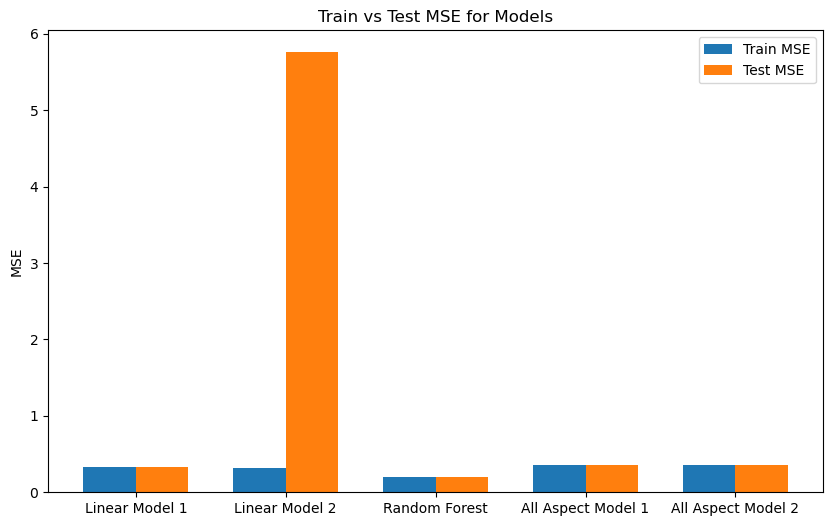

In [512]:
models = ['Linear Model 1', 'Linear Model 2', 'Random Forest', 'All Aspect Model 1', 'All Aspect Model 2']
train_mse = [0.32795214364888936, 0.3150277176721545, 0.19721256707460336, 0.36208693913350903, 0.36208693913350903]
test_mse = [0.3259603326459001, 5.757184084110222, 0.19721256707460336, 0.35990479236699213, 0.35990479236699213]

x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
train_bars = ax.bar(x - width/2, train_mse, width, label='Train MSE')
test_bars = ax.bar(x + width/2, test_mse, width, label='Test MSE')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('MSE')
ax.set_title('Train vs Test MSE for Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

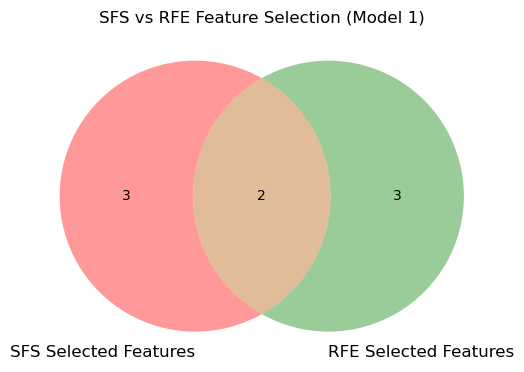

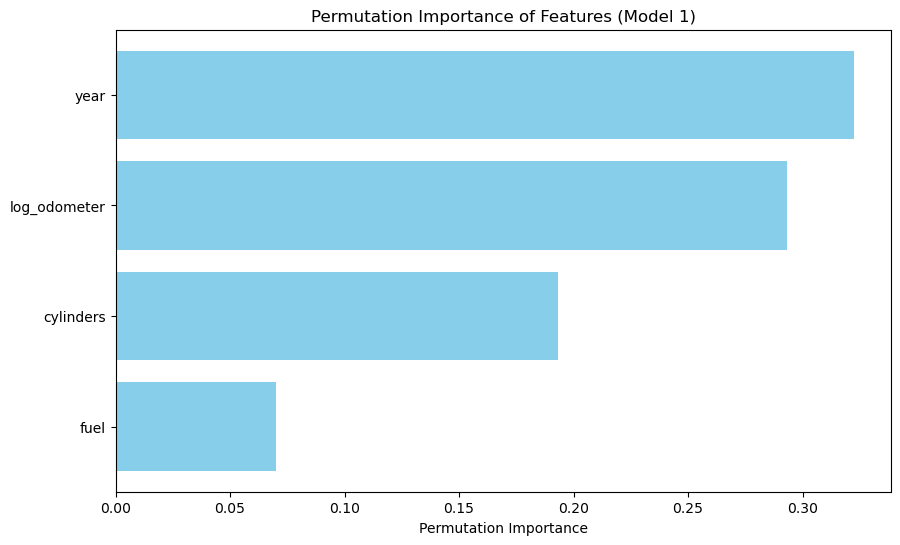

In [516]:


# SFS and RFE features for one of the models
sfs_features = set(['cylinders', 'manufacturer_acura', 'manufacturer_aston-martin', 'manufacturer_buick', 'title_status_lien'])
rfe_features = set(['year', 'cylinders', 'log_odometer', 'manufacturer_acura', 'manufacturer_alfa-romeo'])

plt.figure(figsize=(6, 6))
venn = venn2([sfs_features, rfe_features], ('SFS Selected Features', 'RFE Selected Features'))
plt.title("SFS vs RFE Feature Selection (Model 1)")
plt.show()

# 3. Permutation Importance - Bar Chart
features = ['fuel', 'cylinders', 'log_odometer', 'year']
importance_values = [0.0701, 0.1932, 0.2931, 0.3223]

plt.figure(figsize=(10, 6))
plt.barh(features, importance_values, color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features (Model 1)')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Summary Report for Used Car Dealership

    This report presents an analysis based on various data visualizations, highlighting key insights to help the dealership fine-tune its inventory management and pricing strategy. The objective is to provide actionable  recommendations to maximize profitability and customer satisfaction based on trends and insights from the   data.

#### Feature Importance based on Model
    Venn Diagram above and Permutation Importance of features reveals that Number of Cylinders,Odometer Reading, and Manufacturer, Year are the main drivers of a used car price.

#### Drive, Transmission, and Cylinders
    Observation: Cars with automatic transmission and 4WD drive types dominate the market, particularly those   with 6 or 8 cylinders.
	Recommendation: Maintain a strong inventory of cars with automatic transmission and 4WD drive types.            Especially those with 6 or 8 cylinders, as they make up a large portion of the inventory.

#### State and Region
	Observation: Certain states like California (CA) and Florida (FL) have significantly higher car counts compared to other states, reflecting higher market activity in these regions.
	Recommendation: Invest more heavily in states like CA and FL by focusing marketing and sales efforts there. Analyze regional preferences to further optimize the types of cars offered in each state.
    
#### Condition, Fuel Type, and Transmission
    Observation: Cars in good condition with gasoline fuel and automatic transmission dominate the dataset.Cars in excellent and like new conditions also command a considerable presence, indicating demand for well-maintained cars.
	Recommendation: Maintain a majority of cars in good to excellent condition, focusing on gasoline-fueled, automatic transmission vehicles. Consider expanding the selection of hybrid or electric vehicles to meet emerging market demands.
    
#### Manufacturer
	Observation: Luxury brands like Ferrari, Aston Martin, and Tesla have significantly higher average prices, with many mainstream brands like Ford, Chevrolet, and Toyota offering lower-priced vehicles.
	Recommendation: Tailor inventory by diversifying between high-end luxury cars and affordable mainstream options. This will allow the dealership to cater to a broader customer base, balancing higher margins from luxury cars with higher sales volume from more affordable options.
    
#### Conclusion and Final Recommendations:

    This analysis has highlighted key factors influencing used car prices:

	1.	Key Price Drivers: Focus on year, log_odometer, and cylinders, which are the most important factors in predicting prices.
	2.	Inventory Management: Stock a balance of high-demand models (automatic transmission, 4WD, 6/8 cylinders) and explore opportunities in luxury brands and regions with high car count like California and Florida.
	3.	Condition and Pricing: Invest in cars with good to excellent condition for higher returns, while being cautious with salvage cars.

    By aligning inventory and pricing strategies with these insights, the dealership can optimize sales, increase profitability, and better meet customer demands.
